/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31572 (\N{CJK UNIFIED IDEOGRAPH-7B54}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26696 (\N{CJK UNIFIED IDEOGRAPH-6848}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from font(s) DejaVu Sans.
  fig.canvas

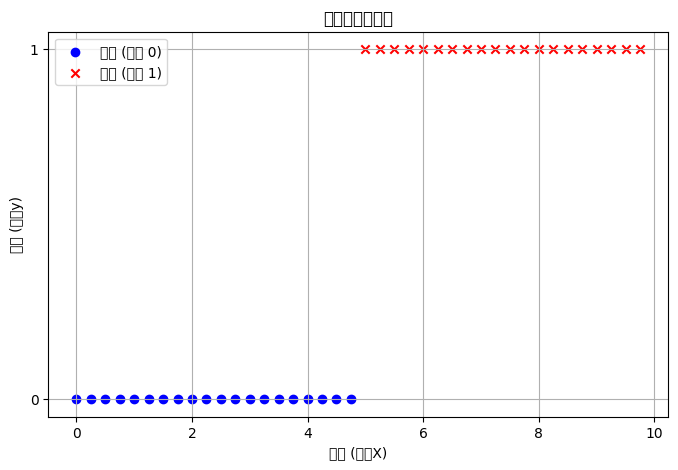

In [1]:
import torch
import matplotlib.pyplot as plt

# --- 准备分类教材 ---

# 1. 创建问题 (X)
# 我们创建从0到10的一系列数字
X = torch.arange(0, 10, 0.25).view(-1, 1)

# 2. 创建标准答案 (y)
# y不再是一个连续的数字，而是类别标签：0 或 1
# X < 5 会返回一个布尔值 (True/False)，我们把它转成浮点数 (1.0/0.0)
y = (X >= 5).float()

# --- 画图看看教材长什么样 ---
def plot_data(X_data, y_data, title="我们的分类教材"):
    plt.figure(figsize=(8, 5))
    # 我们用不同的标记来画出两类点
    plt.scatter(X_data[y_data == 0], y_data[y_data == 0], c='blue', marker='o', label='小数 (类别 0)')
    plt.scatter(X_data[y_data == 1], y_data[y_data == 1], c='red', marker='x', label='大数 (类别 1)')
    plt.title(title)
    plt.xlabel("问题 (数字X)")
    plt.ylabel("答案 (类别y)")
    plt.legend()
    plt.grid(True)
    # y轴只显示0和1
    plt.yticks([0, 1])
    plt.show()

plot_data(X, y)


In [2]:
from torch import nn

# --- 创造一个会做判断的学生 ---

# 我们把“画直线”和“压扁机”打包在一起
model = nn.Sequential(
    nn.Linear(1, 1),   # 第一步：还是像上次一样，先在脑子里画条线
    nn.Sigmoid()       # 第二步：把线上的结果用“压扁机”压到0和1之间
)

print("--- 这是我们学生的新大脑结构 ---")
print(model)


--- 这是我们学生的新大脑结构 ---
Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [3]:
# --- 准备新的评分标准 ---

# 1. 评分标准：专门给判断题打分的老师
loss_fn = nn.BCELoss()

# 2. 反思方法：这个不用变！还是让学生慢慢调整
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) # 学习率可以稍微调大一点

print("新的评分标准准备好了！")


新的评分标准准备好了！


In [4]:
# --- 开始上课 ---

epochs = 200
print("--- 教学开始 ---")

for epoch in range(epochs):
    # 1. 学生做题 (给出判断概率)
    y_pred_prob = model(X)

    # 2. 老师评分
    loss = loss_fn(y_pred_prob, y)

    # 3. 学生反思与调整
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f"学习第 {epoch+1} 遍, 答题差距 (Loss): {loss.item():.4f}")

print("--- 教学结束 ---")


--- 教学开始 ---
学习第 20 遍, 答题差距 (Loss): 0.4461
学习第 40 遍, 答题差距 (Loss): 0.4092
学习第 60 遍, 答题差距 (Loss): 0.3790
学习第 80 遍, 答题差距 (Loss): 0.3540
学习第 100 遍, 答题差距 (Loss): 0.3330
学习第 120 遍, 答题差距 (Loss): 0.3151
学习第 140 遍, 答题差距 (Loss): 0.2998
学习第 160 遍, 答题差距 (Loss): 0.2865
学习第 180 遍, 答题差距 (Loss): 0.2748
学习第 200 遍, 答题差距 (Loss): 0.2644
--- 教学结束 ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21028 (\N{CJK UNIFIED IDEOGRAPH-5224}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26029 (\N{CJK UNIFIED IDEOGRAPH-65AD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas

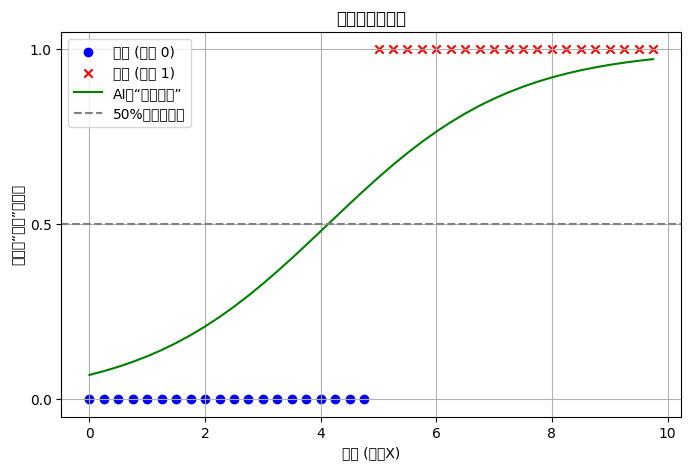


--- 老师开始提问 ---
问题: 2.0 -> AI判断为“大数”的概率是 20.8%, 所以我认为是: 小数
问题: 4.9 -> AI判断为“大数”的概率是 61.9%, 所以我认为是: 大数
问题: 5.1 -> AI判断为“大数”的概率是 64.8%, 所以我认为是: 大数
问题: 9.0 -> AI判断为“大数”的概率是 95.5%, 所以我认为是: 大数


In [5]:
# --- 毕业考试 ---

# 我们来画出学生脑子里的那条S形“信心曲线”
def plot_decision_boundary(X_data, y_data, model):
    model.eval()
    with torch.no_grad():
        y_pred_prob = model(X_data)

    plt.figure(figsize=(8, 5))
    plt.scatter(X_data[y_data == 0], y_data[y_data == 0], c='blue', marker='o', label='小数 (类别 0)')
    plt.scatter(X_data[y_data == 1], y_data[y_data == 1], c='red', marker='x', label='大数 (类别 1)')
    plt.plot(X_data, y_pred_prob, color='green', label='AI的“信心曲线”')
    plt.axhline(y=0.5, color='gray', linestyle='--', label='50%信心分界线') # 画一条50%信心的辅助线
    plt.title("学生的毕业作品")
    plt.xlabel("问题 (数字X)")
    plt.ylabel("判断为“大数”的概率")
    plt.legend()
    plt.grid(True)
    plt.yticks([0, 0.5, 1])
    plt.show()

plot_decision_boundary(X, y, model)


# --- 考几个新问题 ---
print("\n--- 老师开始提问 ---")
test_questions = torch.tensor([[2.0], [4.9], [5.1], [9.0]])
predictions_prob = model(test_questions)

for i in range(len(test_questions)):
    question = test_questions[i].item()
    prob = predictions_prob[i].item()
    # 我们以50%的信心作为判断标准
    answer = "大数" if prob > 0.5 else "小数"
    print(f"问题: {question:.1f} -> AI判断为“大数”的概率是 {prob*100:.1f}%, 所以我认为是: {answer}")
